In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
%matplotlib inline

In [2]:
boston = pd.read_csv('boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
boston.replace([np.inf, -np.inf], np.nan, inplace=True)
boston.fillna(boston.median(), inplace=True)

Univariate Analysis

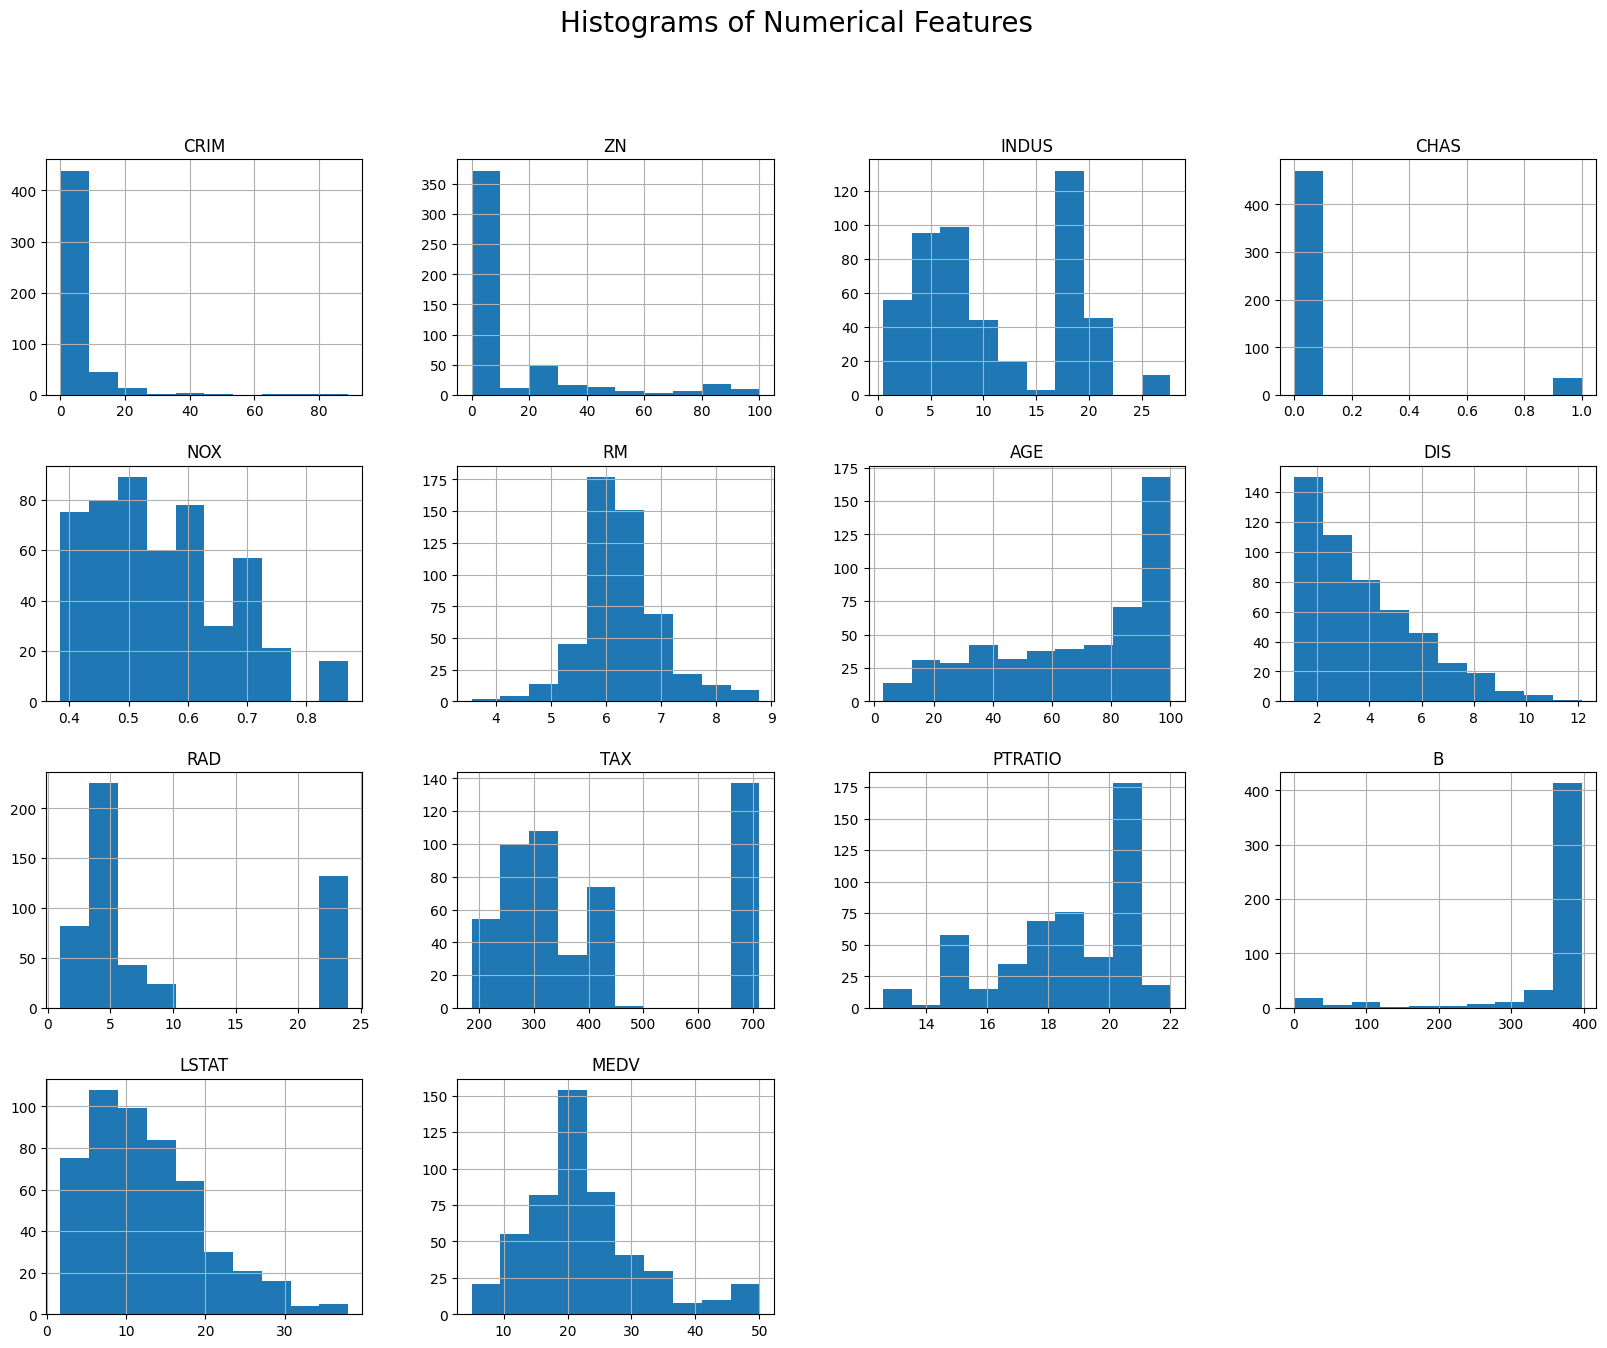

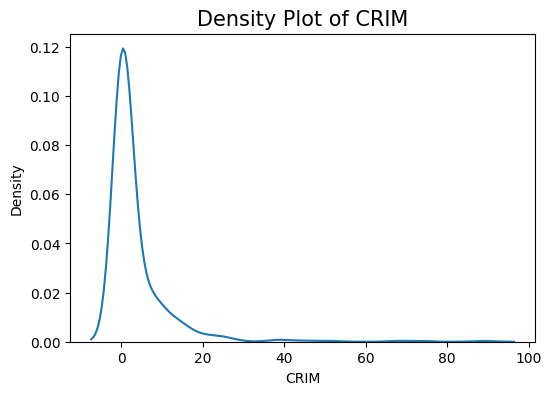

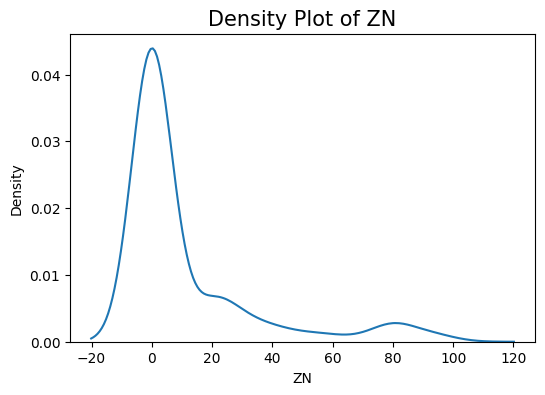

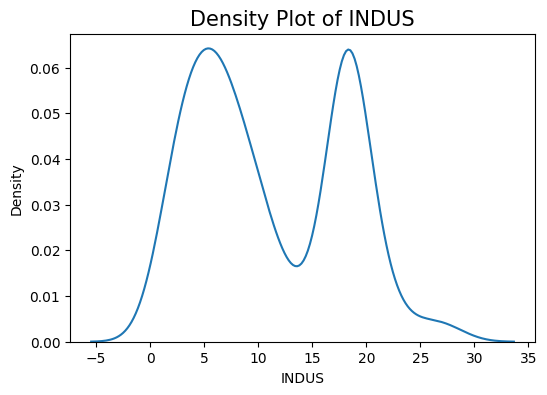

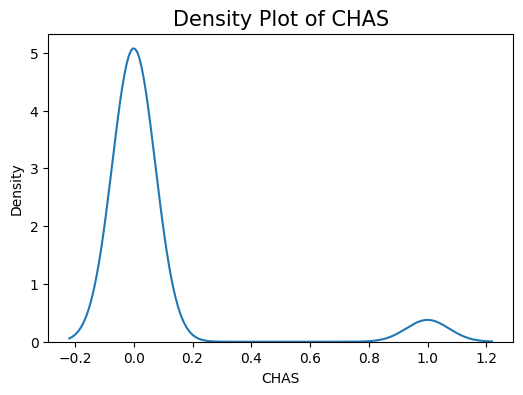

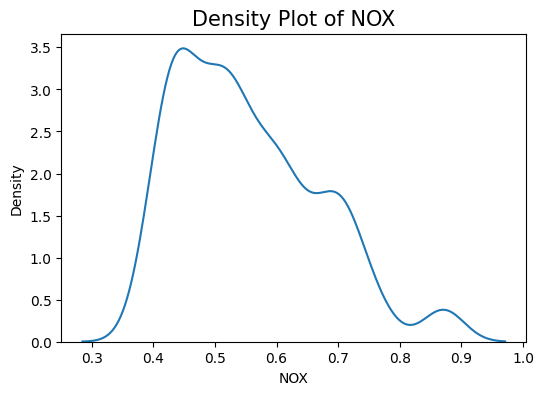

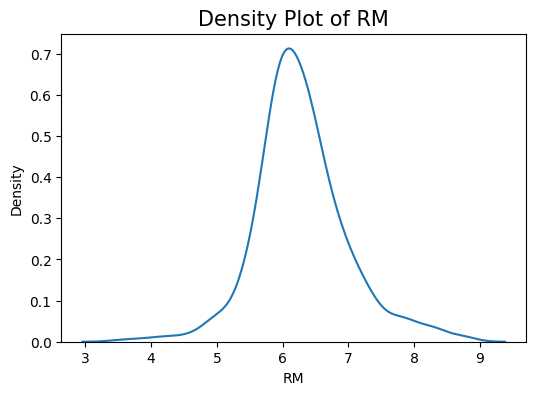

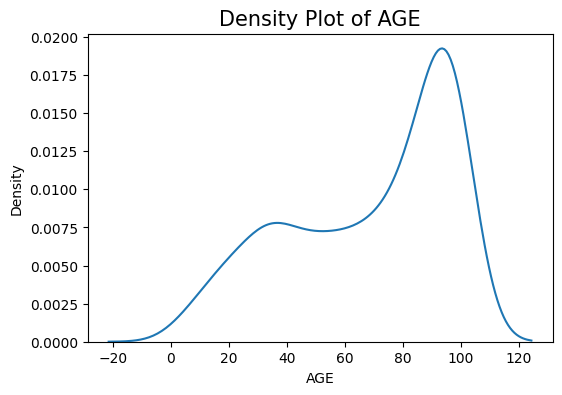

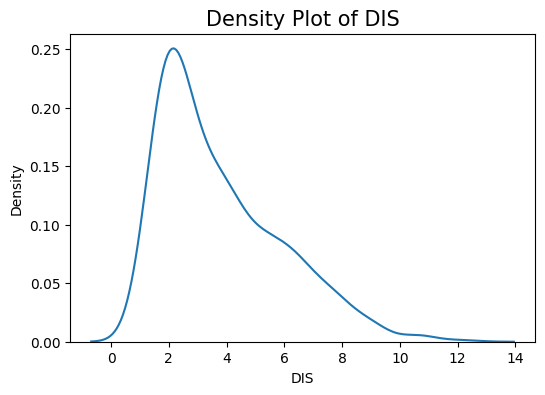

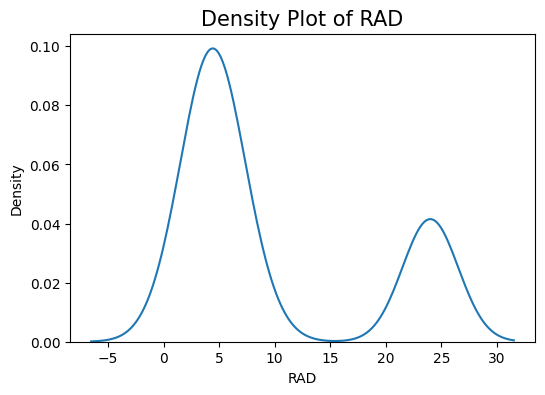

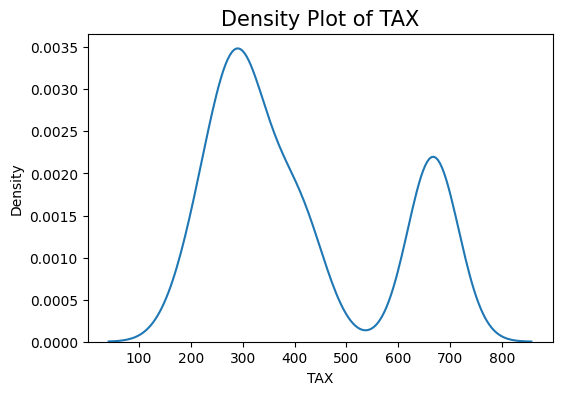

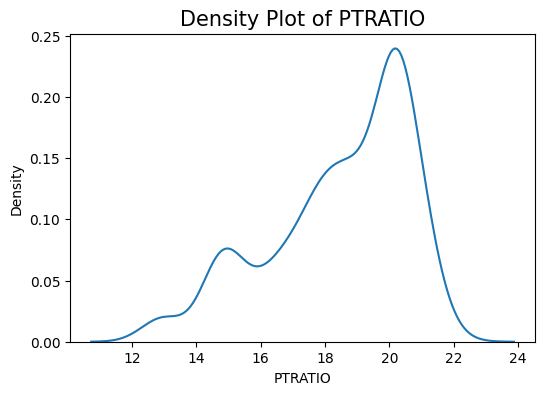

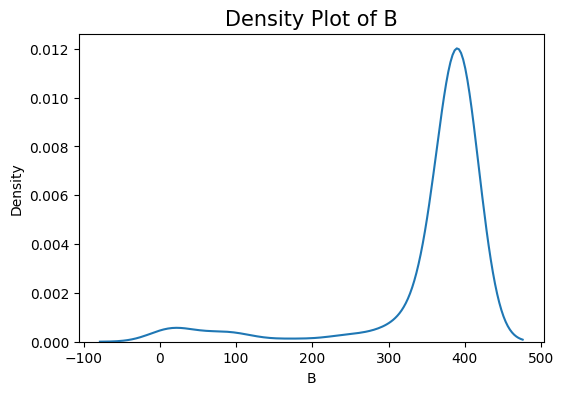

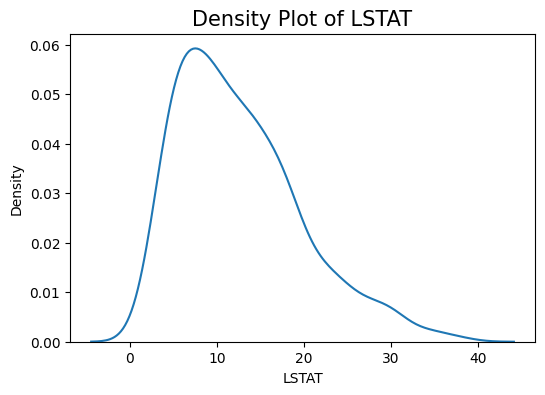

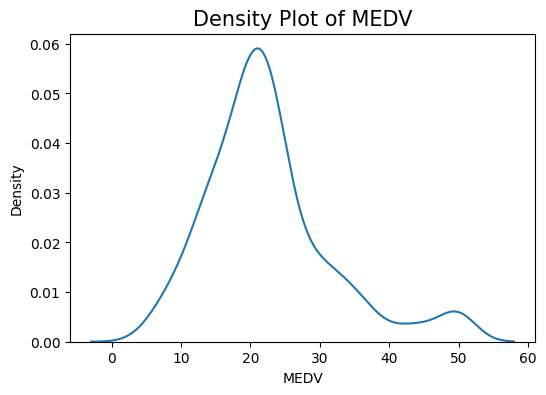

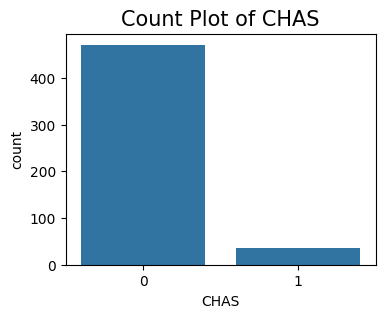

In [7]:
boston.hist(figsize=(20, 15))
plt.suptitle('Histograms of Numerical Features', fontsize=20)
plt.show()

for col in boston.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(boston[col])
    plt.title(f'Density Plot of {col}', fontsize=15)
    plt.show()

plt.figure(figsize=(4, 3))
sns.countplot(x='CHAS', data=boston)
plt.title('Count Plot of CHAS', fontsize=15)
plt.show()

Bivariate Analysis

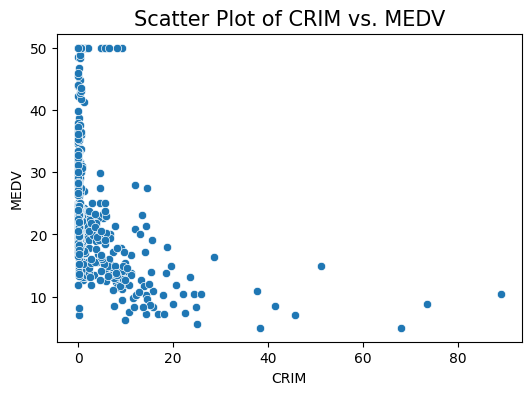

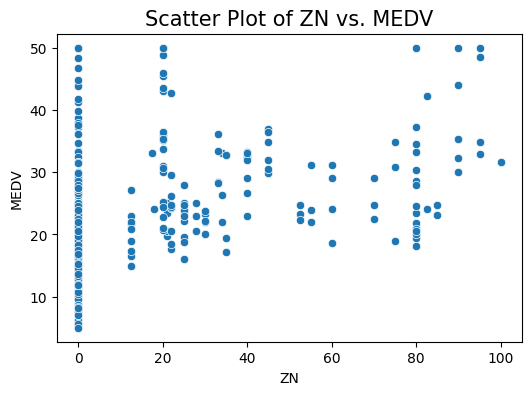

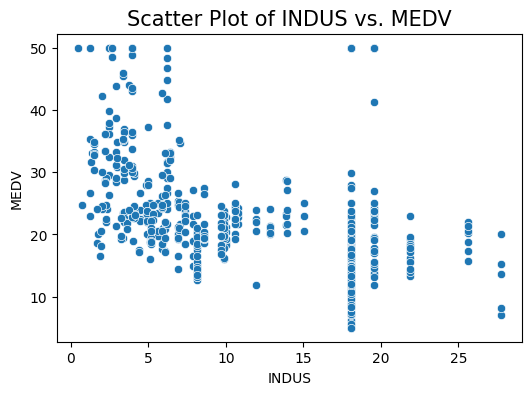

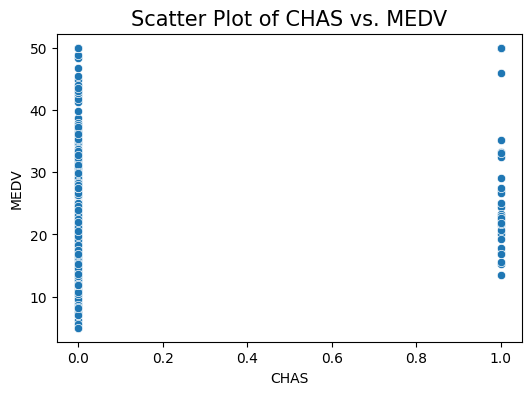

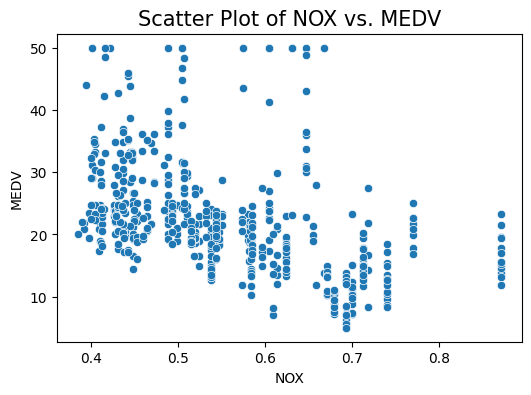

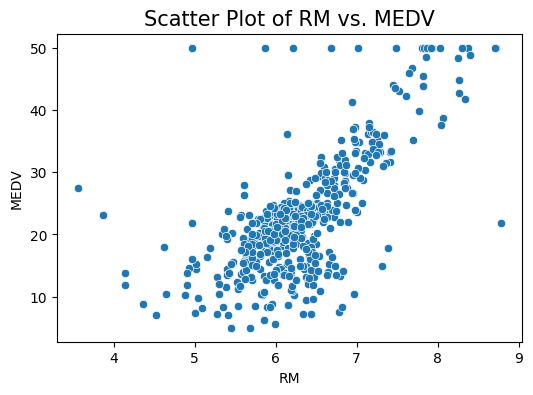

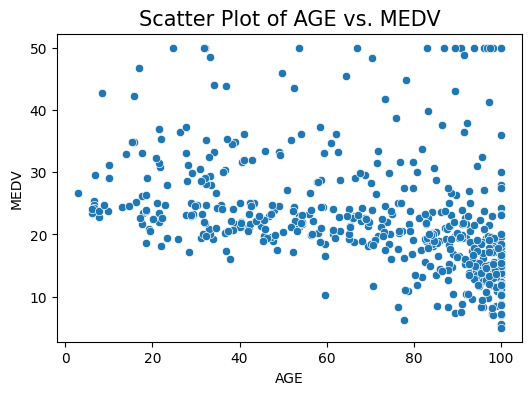

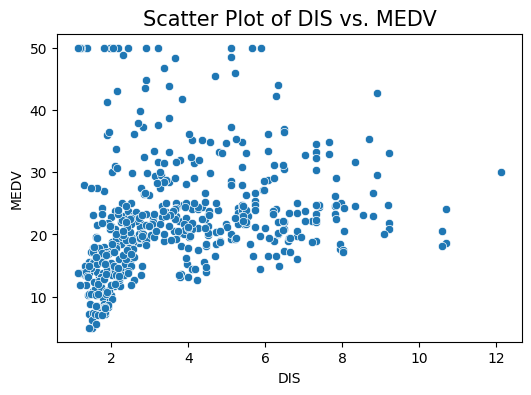

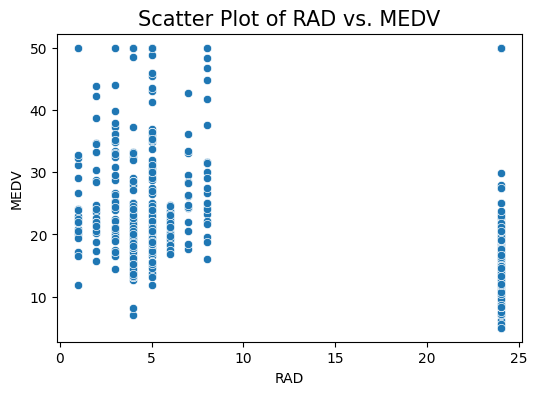

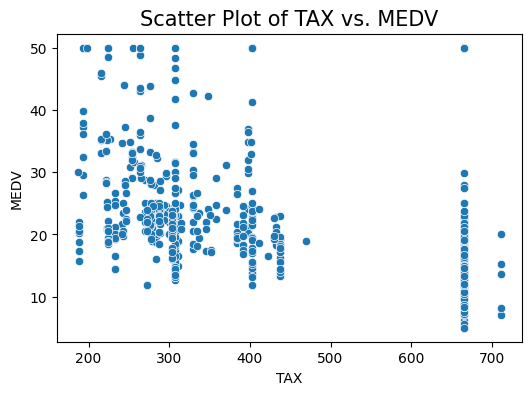

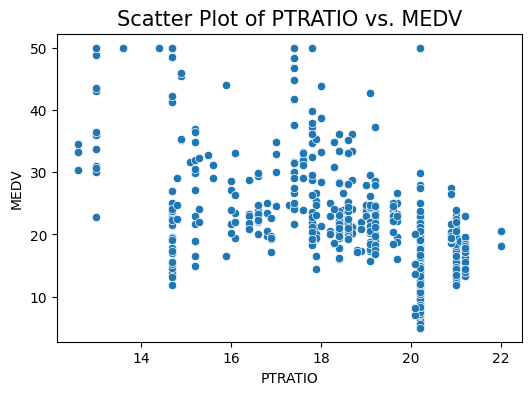

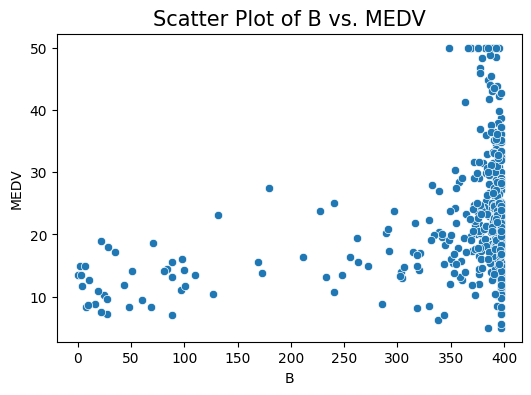

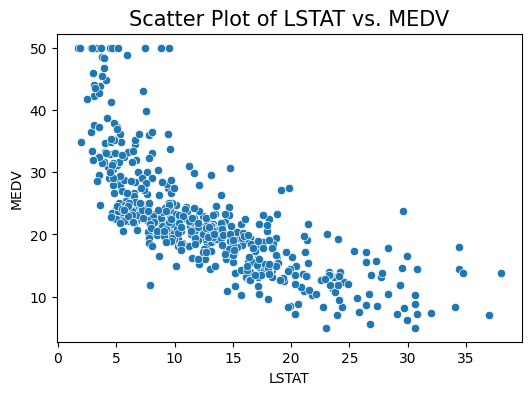

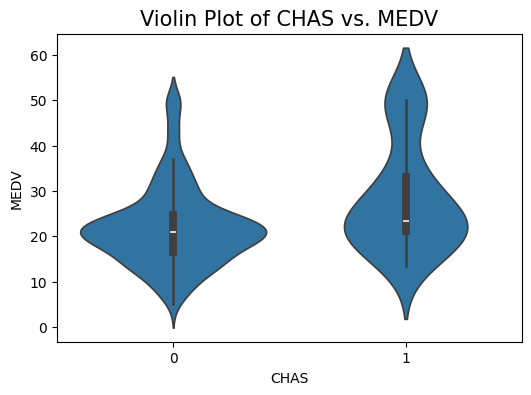

In [8]:
for col in boston.select_dtypes(include=['float64', 'int64']).columns:
    if col != 'MEDV':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=boston[col], y=boston['MEDV'])
        plt.title(f'Scatter Plot of {col} vs. MEDV', fontsize=15)
        plt.xlabel(col)
        plt.ylabel('MEDV')
        plt.show()

plt.figure(figsize=(6, 4))
sns.violinplot(x='CHAS', y='MEDV', data=boston)
plt.title('Violin Plot of CHAS vs. MEDV', fontsize=15)
plt.show()

The CHAS variable indicates whether a property is adjacent to the Charles River (CHAS=1) or not (CHAS=0). The count plot and violin plot for CHAS provide visual insights into its distribution and its relationship with housing prices (MEDV).

Count Plot of CHAS:
The count plot shows that the vast majority of properties in the dataset are not adjacent to the Charles River (CHAS=0), while only a small fraction are located near the river (CHAS=1). This imbalance is expected, as properties directly adjacent to a river are typically less common.

Violin Plot of CHAS vs. MEDV:
The violin plot reveals that properties adjacent to the Charles River (CHAS=1) tend to have higher median values (MEDV) compared to those not adjacent to the river (CHAS=0). This suggests that proximity to the river is associated with higher housing prices, likely due to the desirability of waterfront locations.

Average MEDV for CHAS=0 (not adjacent to the river): 22.09
Average MEDV for CHAS=1 (adjacent to the river): 28.44

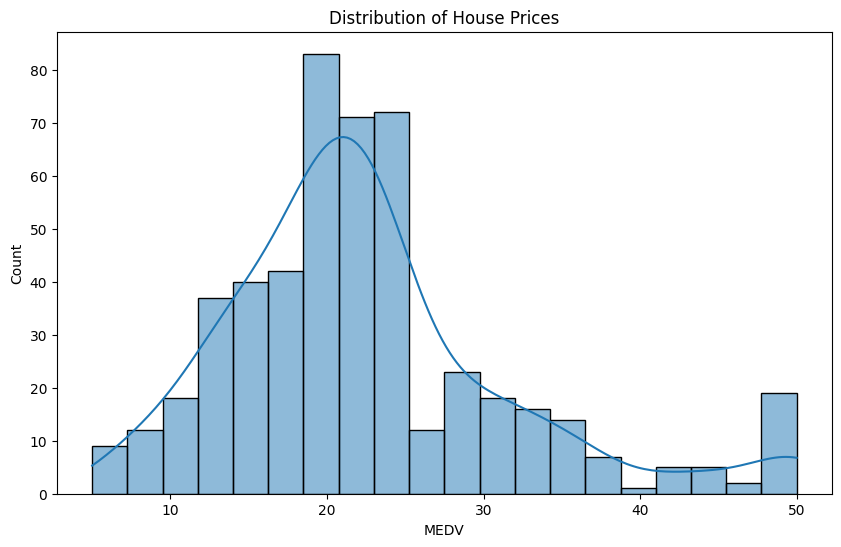

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(boston.MEDV, bins=20, kde=True)
plt.title('Distribution of House Prices')
plt.show()

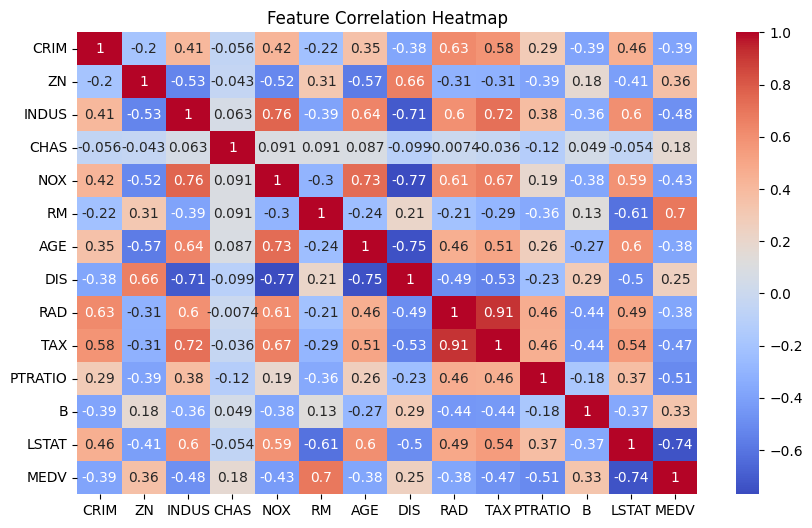

In [10]:
correlation = boston.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [11]:
X = boston.drop(['MEDV'], axis=1)
y = boston['MEDV']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

function for model's performance:

In [14]:
def evaluate(y_true, y_pred, model_name):
    print(f"{model_name} Performance:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred)}")
    print(f"MSE: {mean_squared_error(y_true, y_pred)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred))}")
    print(f"R2 Score: {r2_score(y_true, y_pred)}")
    r2 = r2_score(y_true, y_pred)
    n, k = boston.shape[0], boston.shape[1] - 1
    adjusted_r2 = 1-((1-r2)*(n-1)/(n-k-1))
    print(f"Adjusted R2: {adjusted_r2}\n")

Linear Regression

In [15]:
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
y_pred_lr = lr.predict(x_test_scaled)

Random Forest Regressor

In [16]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 4]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_rf = grid_search.best_estimator_

y_pred_best_rf = best_rf.predict(x_test)

Best Parameters: {'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 50}


Support Vector Regressor

In [17]:
param_grid_svr = {
    'kernel': ['rbf', 'linear'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1]
}
svr = SVR()
grid_search_svr = GridSearchCV(estimator=svr, param_grid=param_grid_svr, cv=3, scoring='neg_mean_squared_error')
grid_search_svr.fit(x_train_scaled, y_train)

best_params_svr = grid_search_svr.best_params_
print("Best Parameters for SVR:", best_params_svr)
best_svr = grid_search_svr.best_estimator_

y_pred_best_svr = best_svr.predict(x_test_scaled)

Best Parameters for SVR: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


KNeighbors Regressor

In [18]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

Gradient Boosting Regressor

In [19]:
param_grid_gbr = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}
gbr = GradientBoostingRegressor(random_state=42, learning_rate=0.1)
grid_search_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid_gbr, cv=3, scoring='neg_mean_squared_error')
grid_search_gbr.fit(x_train, y_train)

best_params_gbr = grid_search_gbr.best_params_
print("Best Parameters for Gradient Boosting Regressor:", best_params_gbr)
best_gbr = grid_search_gbr.best_estimator_

y_pred_best_gbr = best_gbr.predict(x_test)

Best Parameters for Gradient Boosting Regressor: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


Performance of all Models:

In [20]:
evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_best_rf, "Random Forest Regressor (Tuned)")
evaluate(y_test, y_pred_best_svr, "Support Vector Regressor (Tuned)")
evaluate(y_test, y_pred_knn, "KNeighbors Regressor")
evaluate(y_test, y_pred_best_gbr, "Gradient Boosting Regressor (Tuned)")

Linear Regression Performance:
MAE: 3.1890919658878483
MSE: 24.291119474973517
RMSE: 4.928602182665336
R2 Score: 0.668759493535632
Adjusted R2: 0.6600072037306792

Random Forest Regressor (Tuned) Performance:
MAE: 2.0853510214234
MSE: 7.477241139680202
RMSE: 2.734454450101556
R2 Score: 0.8980382462563892
Adjusted R2: 0.8953441348769848

Support Vector Regressor (Tuned) Performance:
MAE: 2.0656911637370525
MSE: 12.738192019658804
RMSE: 3.569060383302418
R2 Score: 0.826298447036198
Adjusted R2: 0.8217087718562601

KNeighbors Regressor Performance:
MAE: 3.6639215686274507
MSE: 25.860125490196076
RMSE: 5.0852851926117255
R2 Score: 0.6473640882039258
Adjusted R2: 0.6380464726483384

Gradient Boosting Regressor (Tuned) Performance:
MAE: 1.9012424323588624
MSE: 6.196467846761358
RMSE: 2.489270545111832
R2 Score: 0.9155032294840894
Adjusted R2: 0.9132705912387502



The performance of all models was evaluated using metrics such as MAE (Mean Absolute Error), MSE (Mean Squared Error), RMSE (Root Mean Squared Error), and R² Score. Among the models, the Gradient Boosting Regressor (Tuned) performed the best, achieving the lowest MAE (1.90), MSE (6.20), and RMSE (2.49), along with the highest R² Score (0.915). This indicates that the Gradient Boosting model was able to capture the underlying patterns in the data more effectively, resulting in more accurate predictions.

The superior performance of the Gradient Boosting model can be attributed to its ability to sequentially correct errors from previous trees, making it highly effective for complex datasets. However, this comes at the cost of increased computational complexity and longer training times compared to simpler models like Linear Regression or KNeighbors Regressor.

On the other hand, Random Forest Regressor (Tuned) also performed well, with an R² Score of 0.898, but it was slightly less accurate than Gradient Boosting. Random Forest is generally more interpretable and less prone to overfitting due to its ensemble nature, but it may not capture intricate relationships as effectively as Gradient Boosting.

Linear Regression and KNeighbors Regressor had lower R² Scores (0.669 and 0.647, respectively), indicating that they struggled to model the non-linear relationships in the data. While Linear Regression is simple and fast, it assumes a linear relationship between features and the target, which may not hold for complex datasets. KNeighbors Regressor, while intuitive, is sensitive to the choice of k and may perform poorly if the data has many irrelevant features.

Feature Importance

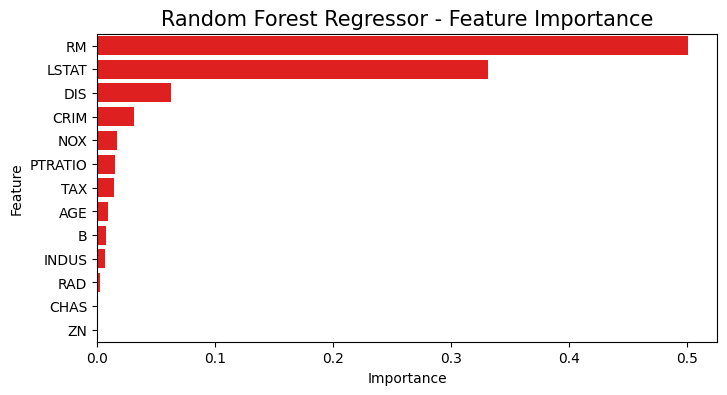

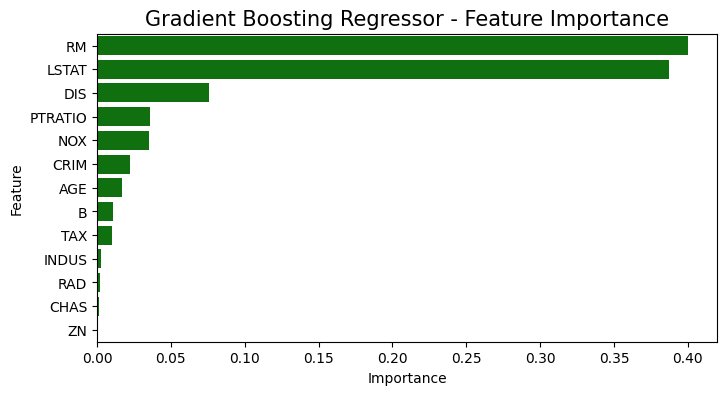

In [21]:
# Feature Importance for Random Forest
if hasattr(best_rf, 'feature_importances_'):
    feature_importance_rf = best_rf.feature_importances_
    feature_names = x_train.columns 
    df_feature_importance_rf = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_rf})
    df_feature_importance_rf = df_feature_importance_rf.sort_values(by='Importance', ascending=False)
    plt.figure(figsize=(8, 4))
    sns.barplot(x='Importance', y='Feature', data=df_feature_importance_rf, color='Red')
    plt.title('Random Forest Regressor - Feature Importance', fontsize=15)
    plt.show()


# Feature Importance for Gradient Boosting Regressor
if hasattr(best_gbr, 'feature_importances_'):
    feature_importance_gbr = best_gbr.feature_importances_
    df_feature_importance_gbr = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_gbr})
    df_feature_importance_gbr = df_feature_importance_gbr.sort_values(by='Importance', ascending=False)
    plt.figure(figsize=(8, 4))
    sns.barplot(x='Importance', y='Feature', data=df_feature_importance_gbr, color='Green')
    plt.title('Gradient Boosting Regressor - Feature Importance', fontsize=15)
    plt.show()

Random Forest Regressor:

The most important features are RM (average number of rooms per dwelling) and LSTAT (percentage of lower-status population), followed by DIS (weighted distances to employment centers) and CRIM (per capita crime rate). This aligns with expectations, as the number of rooms (RM) is often a strong indicator of house size and quality, while LSTAT reflects socioeconomic factors that influence housing prices.

Features like NOX (nitric oxide concentration) and PTRATIO (pupil-teacher ratio) also play a role, though they are less influential. This suggests that environmental and educational factors have a secondary impact on house prices in this dataset.


Gradient Boosting Regressor:

Similar to the Random Forest model, RM and LSTAT are the most important features, confirming their strong influence on house prices. DIS and PTRATIO also rank highly, indicating that accessibility to employment centers and school quality are significant factors.

Interestingly, NOX and CRIM have slightly lower importance in the Gradient Boosting model compared to Random Forest, which may reflect differences in how the two models handle feature interactions and non-linear relationships.


Does This Align with Expectations?
The prominence of RM and LSTAT aligns well with expectations, as these features are directly related to the size and socioeconomic context of the property. Larger homes (RM) typically command higher prices, while areas with a higher percentage of lower-status residents (LSTAT) tend to have lower property values.

The importance of DIS and PTRATIO also makes sense, as proximity to employment centers and school quality are key factors in real estate valuation. However, the relatively lower importance of features like CHAS (Charles River dummy variable) and ZN (proportion of residential land zoned for large lots) suggests that these factors have a smaller impact on house prices in this dataset.

Residual Analysis

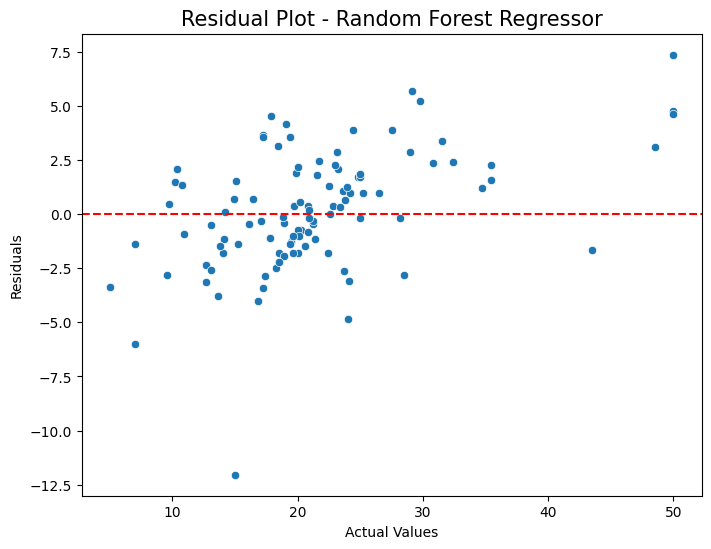

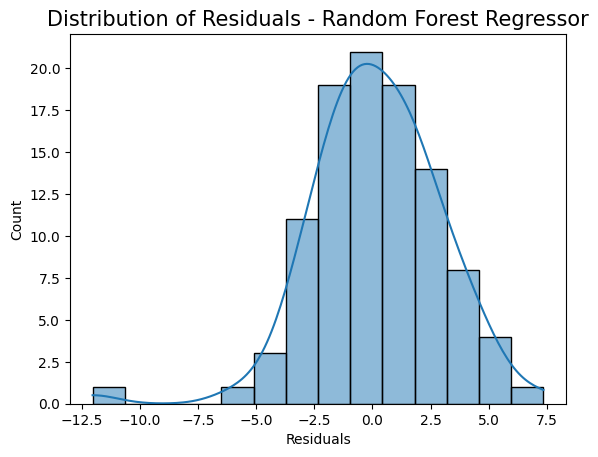

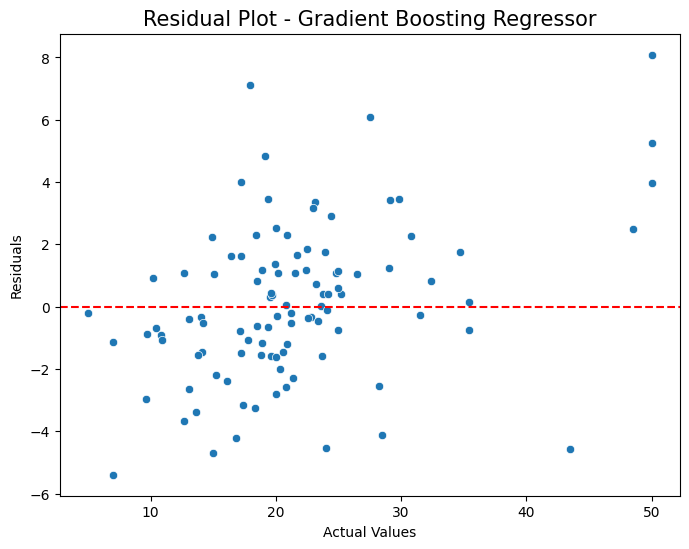

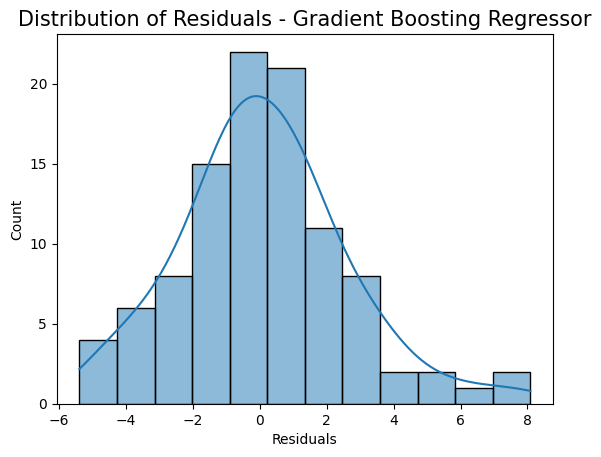

In [22]:
# Residual Analysis for Random Forest
residuals_rf = y_test - y_pred_best_rf
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals_rf)
plt.title('Residual Plot - Random Forest Regressor', fontsize=15)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()
sns.histplot(residuals_rf, kde=True)
plt.title('Distribution of Residuals - Random Forest Regressor', fontsize=15)
plt.xlabel('Residuals')
plt.show()


# Residual Analysis for Gradient Boosting Regressor
residuals_gbr = y_test - y_pred_best_gbr
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals_gbr)
plt.title('Residual Plot - Gradient Boosting Regressor', fontsize=15)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()
sns.histplot(residuals_gbr, kde=True)
plt.title('Distribution of Residuals - Gradient Boosting Regressor', fontsize=15)
plt.xlabel('Residuals')
plt.show()

Random Forest Regressor Residual Plot:

The residuals appear to be randomly distributed around the horizontal line at zero, with no clear patterns or trends. This suggests that the model is capturing the underlying relationships in the data well, and there is no systematic bias in the predictions.
However, there are a few outliers where the residuals are larger (e.g., residuals around -10 to -12.5 for actual values around 10-20). These outliers indicate that the model struggles to predict certain data points accurately, possibly due to noise or unmodeled features in the dataset.
The distribution of residuals is approximately normal, with a slight skew towards negative values. This indicates that the model's errors are mostly centered around zero, which is a good sign, but the skew suggests there may be some room for improvement in handling extreme values.


Gradient Boosting Regressor Residual Plot:

Similar to the Random Forest model, the residuals for the Gradient Boosting model are randomly distributed around zero, with no obvious patterns. This indicates that the model is well-fitted to the data and does not exhibit systematic errors.
The residuals are generally smaller in magnitude compared to the Random Forest model, which aligns with the better performance metrics (lower MAE, MSE, and RMSE) of the Gradient Boosting model.
The distribution of residuals is also approximately normal, with a tighter spread around zero. This suggests that the Gradient Boosting model is making more accurate predictions overall, with fewer large errors.


What Do the Residuals Tell Us About the Model's Assumptions?

The random distribution of residuals around zero supports the assumption that the models are correctly capturing the relationships between the features and the target variable. If there were clear patterns (e.g., a curve or trend in the residuals), it would indicate that the model is missing some important non-linear relationships or interactions.
The absence of heteroscedasticity (i.e., the residuals do not fan out or increase in variance as the predicted values increase) suggests that the models' errors are consistent across the range of predictions. This is a good sign that the models are stable and reliable.
The near-normal distribution of residuals aligns with the assumption that the errors are normally distributed, which is important for the validity of statistical inference and confidence intervals.